In [44]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

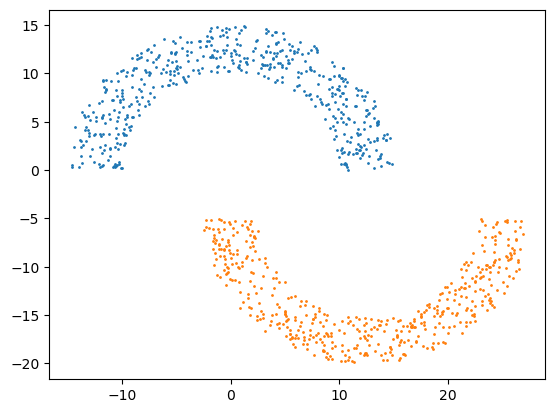

In [45]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

[ 7.          1.03087847 28.48320968]


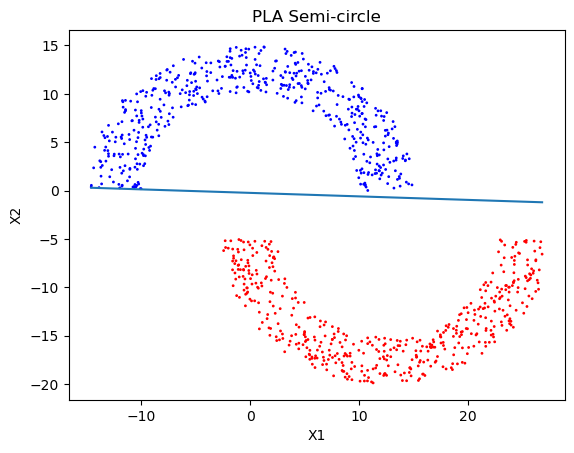

In [46]:
#[LP 1] a)
import numpy as np
from matplotlib.colors import ListedColormap

# PLA algorithm
def pla(X, y):
    w = np.zeros(X.shape[1])
    converged = False
    iterations = 0
    while not converged:
        misclassifies = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != y[i]:
                w += y[i] * X[i]
                misclassifies += 1
        if misclassifies == 0:
            converged = True
    return w

X1 = np.array(top)
X2 = np.array(bottom)

X1 = np.column_stack((np.ones(X1.shape[0]), X1))
X2 = np.column_stack((np.ones(X2.shape[0]), X2))

y1 = np.ones(X1.shape[0])
y2 = -np.ones(X2.shape[0])

X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

w_pla = pla(X, y)
print(w_pla)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(y), s=1)

x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-w_pla[0] - w_pla[1] * x_decision) / w_pla[2]
plt.plot(x_decision, y_decision)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PLA Semi-circle')
plt.show()

[ 0.25834738 -0.00786847  0.07845214]


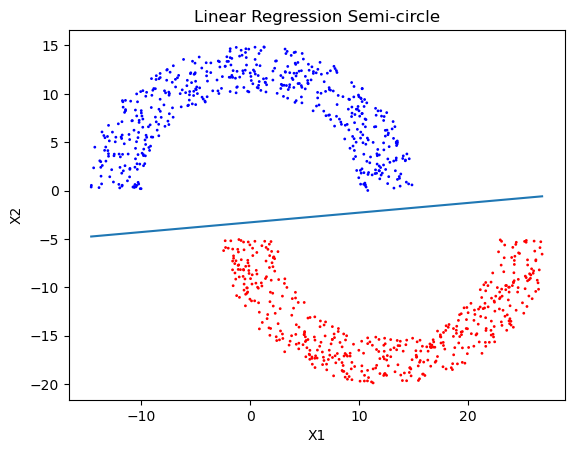

In [47]:
#[LP 1] b)

def linear_regression(X, y):
    w_lr = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), y)
    return w_lr

w_lr = linear_regression(X, y)
print(w_lr)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(y), s=1)

x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-w_lr[0] - w_lr[1] * x_decision) / w_lr[2]
plt.plot(x_decision, y_decision)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression Semi-circle')
plt.show()

##### Based on the observation of the two results above. We can find out that even though both algorithm provide a linear seperator, the linear regression's result is more closer to the center between two semi-circles. However, the PLA provide linear seperator that is closer to the top semi-circle. In this case, we can say that the linear regression provide a better result.

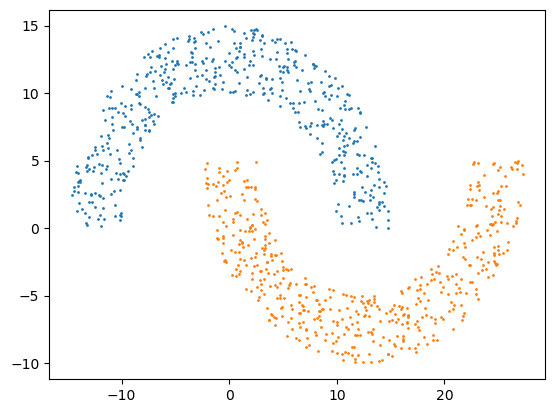

In [48]:
# [LP 2] setup
rad = 10
thk = 5
sep = -5

top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [49]:
# [LP 2] a)
X1 = np.array(top)
X2 = np.array(bottom)

X1 = np.column_stack((np.ones(X1.shape[0]), X1))
X2 = np.column_stack((np.ones(X2.shape[0]), X2))

y1 = np.ones(X1.shape[0])
y2 = -np.ones(X2.shape[0])

X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

w_pla = pla(X, y)

KeyboardInterrupt: 

##### If using the PLA function on previous code (converges one).  The function will ends in an infinite loop because there is always some misclassification, which the function will never set converge to true.

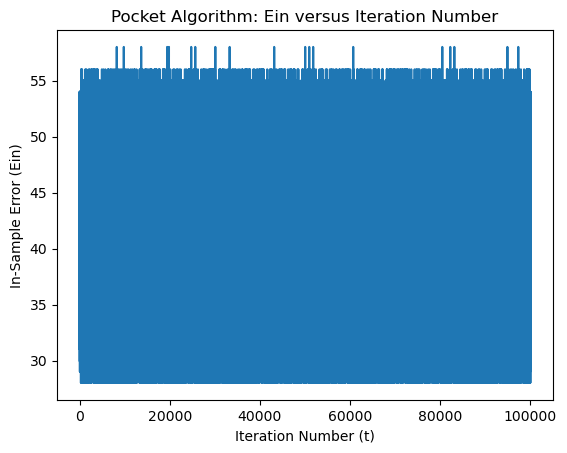

In [50]:
# [LP 2] b)
def pocket(X, y, max_iterations=100000):
    w_pocket = np.zeros(X.shape[1])
    best_w = np.copy(w_pocket)
    min_error = float('inf')
    errors = []
    
    for t in range(max_iterations):
        errors_t = 0
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w_pocket)) != y[i]:
                w_pocket += y[i] * X[i]
                errors_t += 1
        
        if errors_t < min_error:
            min_error = errors_t
            best_w = np.copy(w_pocket)
        
        errors.append(errors_t)
    
    return best_w, errors

best_w, errors = pocket(X, y)

plt.plot(range(1, 100001), errors)
plt.xlabel('Iteration Number (t)')
plt.ylabel('In-Sample Error (Ein)')
plt.title('Pocket Algorithm: Ein versus Iteration Number')
plt.show()

[-23.         -14.83443364  -3.77643718]


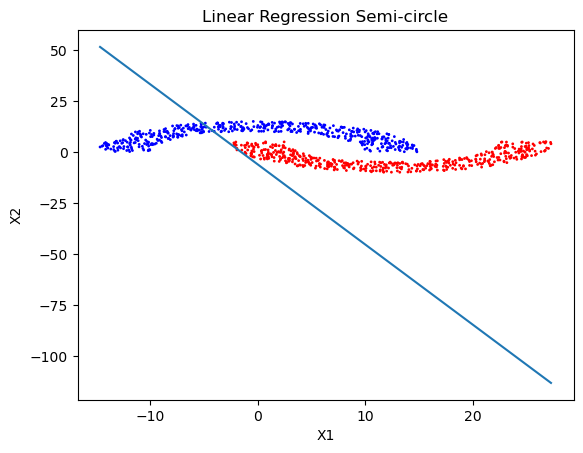

In [51]:
# [LP 2] c)
plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(y), s=1)

x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-best_w[0] - best_w[1] * x_decision) / best_w[2]
plt.plot(x_decision, y_decision)
print(best_w)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression Semi-circle')
plt.show()

[-0.13497104 -0.02154704  0.10293817]


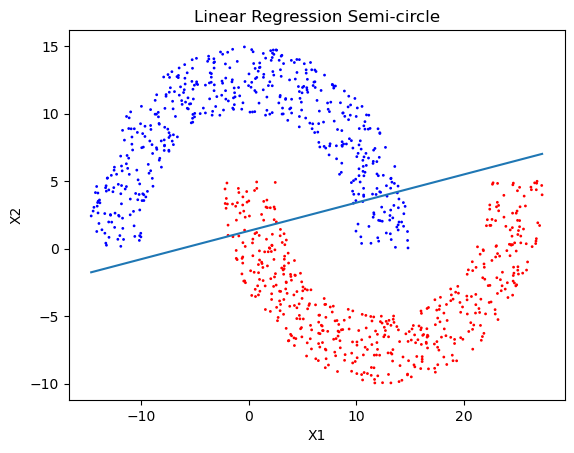

In [52]:
#[HP] d)
w_lr_new = linear_regression(X, y)
print(w_lr_new)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(y), s=1)

x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = (-w_lr_new[0] - w_lr_new[1] * x_decision) / w_lr_new[2]
plt.plot(x_decision, y_decision)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression Semi-circle')
plt.show()

In [57]:
#[HP] e) Setup
def third_order_poly(X):
    X_final = []
    for i in range(X.shape[0]):
        x1 = X[i][1]
        x2 = X[i][2]
        x3 = x1 ** 2
        x4 = x1 * x2
        x5 = x2 ** 2
        x6 = x1 ** 3
        x7 = (x1 ** 2) * x2
        x8 = x1 * (x2 ** 2)
        x9 = x2 ** 3
        x_poly = np.array([1.0, x1, x2, x3, x4, x5, x6, x7, x8, x9])
        X_final.append(x_poly)
    return X_final

X_third = np.array(third_order_poly(X))

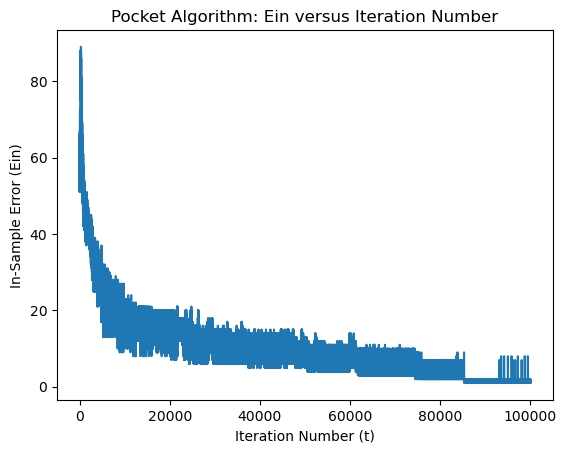

In [58]:
#[HP] e) run b)
best_w, errors = pocket(X_third, y)

plt.plot(range(1, 100001), errors)
plt.xlabel('Iteration Number (t)')
plt.ylabel('In-Sample Error (Ein)')
plt.title('Pocket Algorithm: Ein versus Iteration Number')
plt.show()

In [73]:
# code based on processor's provided samply code in LinearRegressionNonLinear.ipynb
def plot4poly(w, color='red'):
  axes = plt.gca()
  xlims = axes.get_xlim()
  ylims = axes.get_ylim()
  x1 = np.linspace(xlims[0], xlims[1], 1000)
  x2 = np.linspace(ylims[0], ylims[1], 1000)
  # meshgrid
  XM1, XM2 = np.meshgrid(x1, x2)
  def f(x1, x2, w):
    return w[0] + w[1]*x1 + w[2]*x2 + w[3]*(x1**2) + w[4]*(x1*x2) + w[5]*(x2**2) + w[6]*(x1**3) + w[7]*((x1**2)*x2) + w[8]*(x1*(x2**2)) + w[9]*(x2**3)
  plt.contour(XM1, XM2, f(XM1, XM2, w), 1, colors = color)

[-705688.         -402028.04313801 -138174.26552034  208540.24382838
  168556.039669   -514428.80272845  -12003.42127834   -7589.95315647
   25044.08799517   87289.07213178]


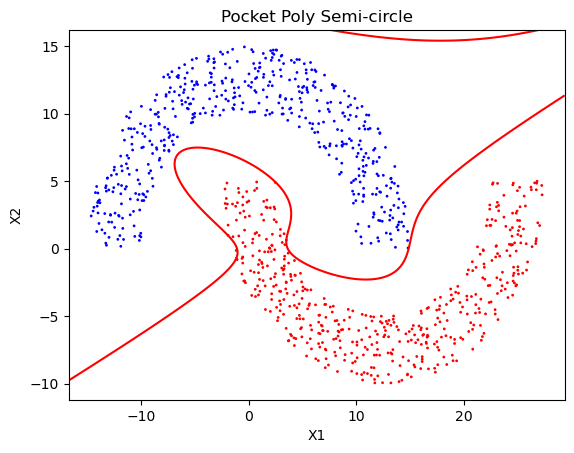

In [77]:
#[HP] e) run c)
plt.scatter(X_third[:, 1], X_third[:, 2], c=ListedColormap(("red", "blue"))(y), s=1)
plot4poly(best_w)
print(best_w)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pocket Poly Semi-circle')
plt.show()

[-8.61138975e-01  1.62041466e-02  1.30297707e-01  8.72539951e-03
  1.25345433e-02  1.49586822e-02 -3.85749854e-04 -5.54225276e-04
 -1.06918784e-03 -1.07199145e-03]


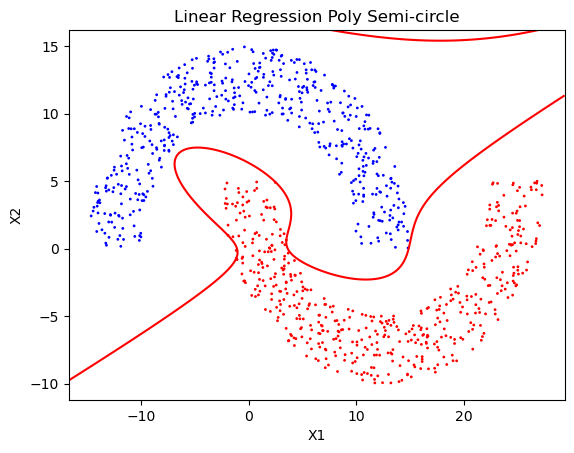

In [78]:
#[HP] e) run d)
w_lr_new = linear_regression(X_third, y)
print(w_lr_new)

plt.scatter(X[:, 1], X[:, 2], c=ListedColormap(("red", "blue"))(y), s=1)
plot4poly(best_w)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression Poly Semi-circle')
plt.show()